In [1]:
import smart_open
import gensim
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
import string
string.punctuation
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import joblib
from sklearn.decomposition import PCA,SparsePCA

/Users/ramyanee/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /Users/ramyanee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("/Users/ramyanee/Downloads/ML/IMDB Dataset.csv")

In [3]:

def make_wordCloud(text):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
def preprocess(text):
    text = re.sub(re.compile('<.*?>') , '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = text.lower()
    text = "".join([t for t in text if t not in string.punctuation])
    text = remove_stopwords(text)
    # text = word_tokenize(text)
    return text

def avgw2v(text,dim,model):
    n = len(text)
    sumVector = np.zeros(dim)

    for t in text:
        sumVector = np.add(sumVector,model.wv[t])
    return np.divide(sumVector,n)

In [4]:
dfpos = df[df['sentiment']=='positive']
dfneg = df[df['sentiment']=='negative']
postext = " ".join(dfpos['review'])
negtext = " ".join(dfneg['review'])

# Word Clouds of positive and negative reviews before preprocessing

### Word Cloud of positive review

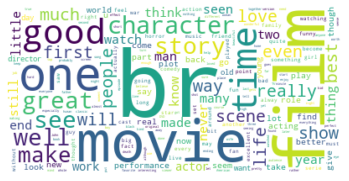

In [5]:
make_wordCloud(postext)


### Word Coud of negative review

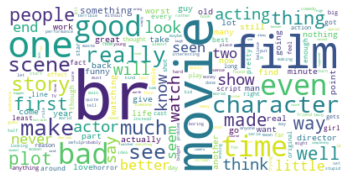

In [6]:
make_wordCloud(negtext)

In [7]:
dfcopy = df.copy()
# for i in range(len(dfcopy)):
#     dfcopy['review'][i] = preprocess(dfcopy['review'][i])

dfcopy['review']=dfcopy['review'].apply(lambda x:preprocess(x))
dfcopy.to_csv('q1SavedObjects/IMDBDatasetCleaned.csv')
dfpos_clean = dfcopy[dfcopy['sentiment']=='positive']
dfneg_clean = dfcopy[dfcopy['sentiment']=='negative']
postextClean = " ".join(dfpos_clean['review'])
negtextClean = " ".join(dfneg_clean['review'])

# Word Clouds of positive and negative reviews after preprocessing


Difference observed: html tags like br are gone, stop words like 'see','well', etc that was showing up loud in the word cloud before are no longer there. more relevant words to positive and negative sentiments respectively are showing uo more prominently in the word cloud

### Word Coud of positive review



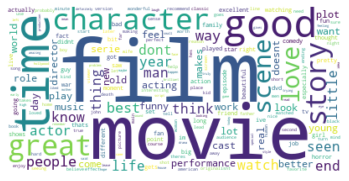

In [8]:
make_wordCloud(postextClean)


### Word Coud of negative review

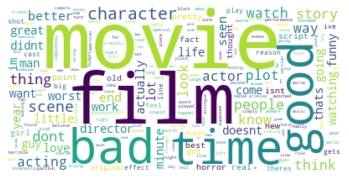

In [9]:
make_wordCloud(negtextClean)

In [10]:
df_clean = pd.read_csv("q1SavedObjects/IMDBDatasetCleaned.csv")
df_clean = df_clean.drop("Unnamed: 0",axis=1)
print(df_clean['review'].isna().sum())
df_clean=df_clean.dropna(axis=0)
df_clean = df_clean.reset_index()

1


In [11]:
tokenizedReviews = df_clean['review'].apply(gensim.utils.simple_preprocess)

X = list(tokenizedReviews)
Y = df_clean.replace({'sentiment': {'positive': 1, 'negative': 0}})['sentiment']
Y = np.array(Y)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=42)


In [12]:
dim = 150
model = Word2Vec(X,window = 10, workers=5,vector_size=dim,min_count=1,)


# Word vectors for individual words
#### wordToVector.csv contains word vectors for individual words


In [13]:
flatX = np.unique([x for sublist in X for x in sublist])
wordToVectorMapping = {}
for word in flatX:
    if word in model.wv:
        wordToVectorMapping[word]=model.wv[word]

wordToVectorMapping = pd.DataFrame(wordToVectorMapping).T
wordToVectorMapping = wordToVectorMapping.sample(frac=1)
wordToVectorMapping.to_csv("q1SavedObjects/wordToVector.csv")

## word vectors generated for each word, you may enter a random word to check it's word vector

In [14]:
word = input("enter a word to find it's word vector")
model.wv[word]

array([ 2.44065911e-01, -6.63393617e-01,  1.33182853e-01, -1.96978539e-01,
       -2.34992400e-01, -4.17291492e-01,  1.49639472e-01, -2.93330159e-02,
       -2.45942473e-01, -1.32390350e-01,  1.36415854e-01,  1.43473908e-01,
       -4.64967430e-01, -4.03260469e-01, -1.89091042e-01,  6.03080951e-02,
        2.34475166e-01,  2.13069931e-01, -2.03428417e-01, -5.35107702e-02,
       -3.47252071e-01,  2.05978319e-01,  1.53085619e-01,  2.51535565e-01,
        2.69791365e-01, -3.81009519e-01, -4.16375071e-01, -1.48250863e-01,
       -2.01385796e-01,  1.31764352e-01, -4.27930981e-01,  2.58660279e-02,
       -2.12206483e-01,  8.67818072e-02, -5.70766777e-02, -3.41845788e-02,
        9.54766944e-02, -1.58869196e-02,  4.53083247e-01, -4.69485343e-01,
       -1.76987305e-01, -1.93942174e-01, -2.82698274e-02, -9.15150121e-02,
        5.07959604e-01,  5.41962534e-02, -7.04898238e-02,  3.58520448e-02,
       -1.14840321e-01,  7.33475327e-01,  3.44183803e-01,  9.16911289e-02,
       -4.07316238e-02, -

# Average vectors for each review

In [15]:
avg_W2V_X = []
for x in X:
    avg_W2V_X.append(avgw2v(x,dim,model))
pca = PCA(n_components=2)
wv = pca.fit_transform(avg_W2V_X)
sparsePCA = SparsePCA(n_components=2)
wv_ = sparsePCA.fit_transform(avg_W2V_X)

## avg_W2V_X  contains a single vector representation of each review 

In [16]:
wvdf = pd.DataFrame(list(zip(wv.T[0],wv.T[1], Y)),columns=['X1','X2','Y'])
wvdf_ = pd.DataFrame(list(zip(wv_.T[0],wv_.T[1], Y)),columns=['X1','X2','Y'])

/Users/ramyanee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='X2'>

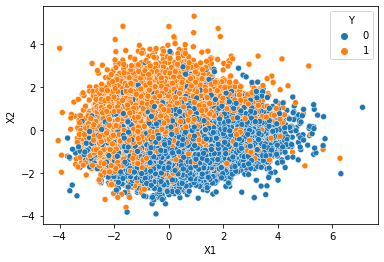

In [17]:
sns.scatterplot(wvdf['X1'],wvdf['X2'],hue=wvdf.Y)

## 2D PCA plot above, the classes are somewhat separable

/Users/ramyanee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='X2'>

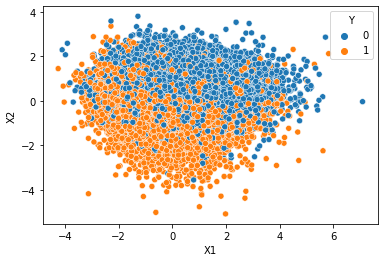

In [18]:
sns.scatterplot(wvdf_['X1'],wvdf_['X2'],hue=wvdf_.Y)

In [19]:
avg_W2V_Train = []
for x in x_train:
    avg_W2V_Train.append(avgw2v(x,dim,model))

avg_W2V_Test = []
for x in x_test:
    avg_W2V_Test.append(avgw2v(x,dim,model))

In [20]:

scalerTrain = StandardScaler()
scalerTrain.fit(avg_W2V_Train)
x_train = scalerTrain.transform(avg_W2V_Train)
x_test = scalerTrain.transform(avg_W2V_Test)


# Fitted with rbs, linear, sigmoid, and poly kernels. 
## rbf is giving the best results.

In [21]:

modelMap = {1:'rbf',2:'linear',3:'sigmoid',4:'poly'}
scores = []
for i in modelMap:
    clf = SVC(kernel=modelMap[i])
    clf.fit(x_train,y_train)
    joblib.dump(clf,f"q1SavedObjects/q1_w2v_{modelMap[i]}.pkl")
    _score = clf.score(x_test,y_test)
    print(f"The score with {modelMap[i]} is: {_score}")
    scores.append([f"{modelMap[i]} kernel",_score])
scores = pd.DataFrame(scores,columns=['kernel','score'])

The score with rbf is: 0.8734
The score with linear is: 0.8705
The score with sigmoid is: 0.7724
The score with poly is: 0.8644


### Analysis
The score with rbf is: 0.8734  
The score with linear is: 0.8705  
The score with sigmoid is: 0.7724  
The score with poly is: 0.8644  
  
rbf is giving the best accuracy of 87.84% with default gamma value








# Decision Boundary visualisation with rbf kernel using PCA

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

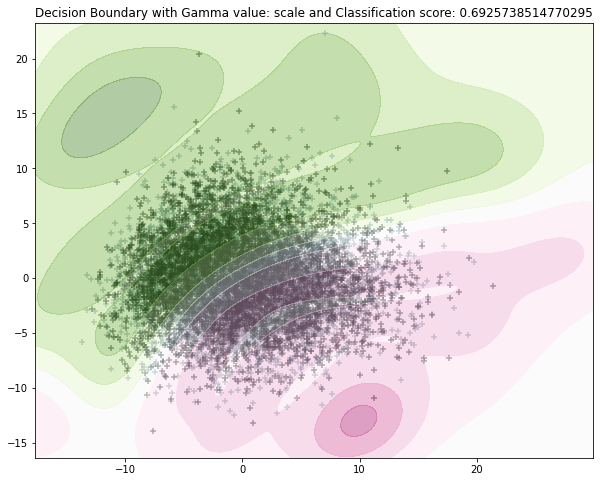

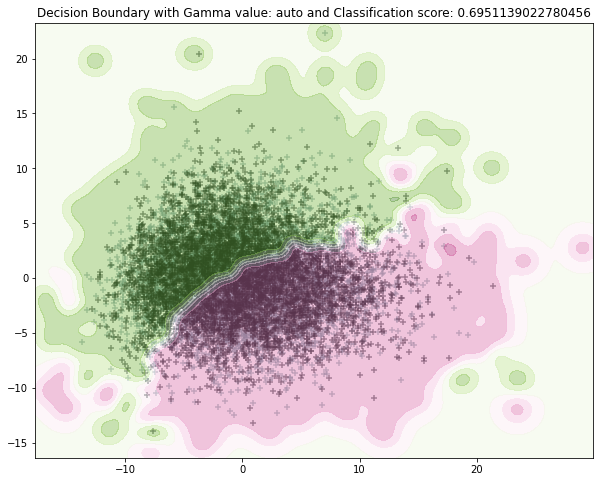

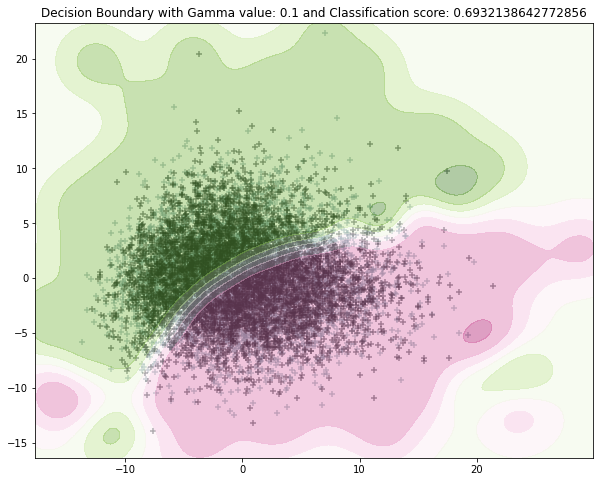

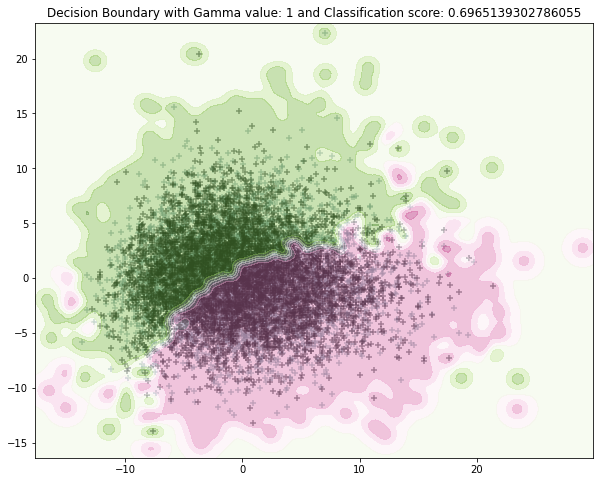

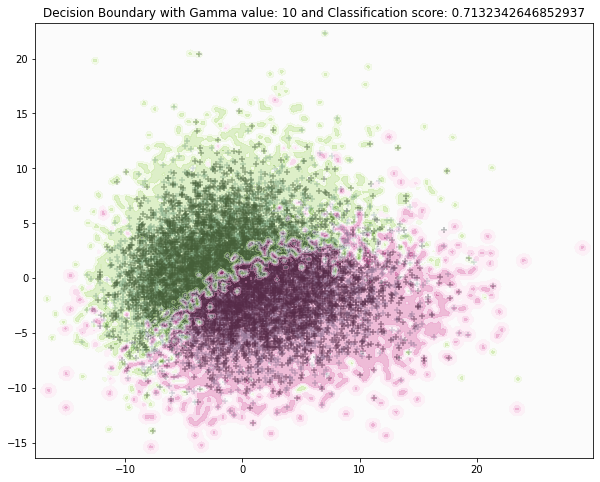

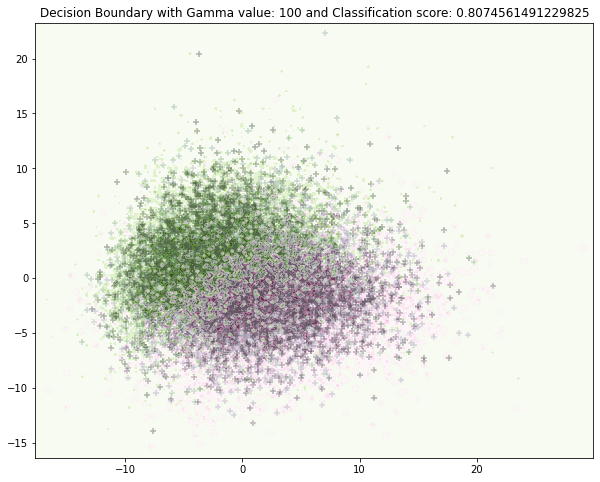

In [24]:
scalerTrain = StandardScaler()
X_=scalerTrain.fit_transform(avg_W2V_X)
pca_ts = SparsePCA(n_components=2)
xts = pca_ts.fit_transform(X_)

for g in ['scale','auto',0.1,1,10,100]:
    clf_ = SVC(kernel='rbf',verbose=True,gamma=g)
    classification = clf_.fit(xts,Y)
    x,y = xts[:,0],xts[:,1]
    xmin,xmax,ymin,ymax = x.min()-1,x.max()+1,y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(xmin,xmax,0.2),np.arange(ymin,ymax,0.2))
    idx1 = np.where(y_test==0)
    idx2 = np.where(y_test==1)
    z = classification.decision_function(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    fig,ax = plt.subplots(figsize=(10,8))
    fig.patch.set_facecolor('white')
    ax.scatter(x[idx1],y[idx1],c='#6B8E94',label="negative reviews",marker='+', alpha=0.5)
    ax.scatter(x[idx2],y[idx2],c='#020E10',label="positive reviews",marker='+',alpha=0.5)
    ax.contourf(xx,yy,z,cmap="PiYG",alpha=0.4)
    ax.set_title(f"Decision Boundary with Gamma value: {g} and Classification score: {clf_.score(xts,Y)}")


## comment:

Classes are separable however separation is not that great in 2D.
Higher value of gamma gives better separation with more complex decision boundaries